In [1]:
import os
os.chdir("../")

In [2]:
from comchoice.aggregate import borda, dowdall, divisiveness, ahp, copeland

import pandas as pd

In [3]:
from comchoice.datasets import set_synthetic_pairwise, set_synthetic_election

In [4]:
data = [
    {"voters": 19, "rank": "A>B>C>D>E>F"},
    {"voters": 12, "rank": "F>A>B>C>D>E"},
    {"voters": 12, "rank": "E>D>C>B>F>A"},
    {"voters": 9, "rank": "B>A>C>D>E>F"},
    {"voters": 9, "rank": "F>E>D>C>B>A"},
    {"voters": 10, "rank": "F>B>A>C>D>E"},
    {"voters": 10, "rank": "E>D>C>A>F>B"},
    {"voters": 10, "rank": "E>B>A>C>D>F"},
    {"voters": 10, "rank": "F>D>C>A>E>B"},
    {"voters": 10, "rank": "D>B>A>C>E>F"},
    {"voters": 10, "rank": "F>E>C>A>D>B"},
]

df = pd.DataFrame(data)
df.head()

,voters,rank
0,19,A>B>C>D>E>F
1,12,F>A>B>C>D>E
2,12,E>D>C>B>F>A
3,9,B>A>C>D>E>F
4,9,F>E>D>C>B>A


In [5]:
# df = load_synthetic_election(
#     n_candidates=100,
#     n_voters=5000,
#     random_state=1,
#     delimiter=">"
# )

In [6]:
# df

In [7]:
from itertools import combinations

In [8]:
voters = "voters"
voter = "voter"



In [9]:
from comchoice.preprocessing import to_pairwise, to_individual_voter

In [10]:
df2 = to_pairwise(df, origin="voting")
df2

,voter,candidate_a,candidate_b,selected
0,0,A,B,A
0,0,A,C,A
0,0,A,D,A
0,0,A,E,A
0,0,A,F,A
...,...,...,...,...
120,120,C,D,C
120,120,C,B,C
120,120,A,D,A
120,120,A,B,A


In [18]:
a = copeland(df)
a

,candidate,value,rank
0,A,0.8,1
2,C,0.6,2
3,D,0.6,2
4,E,0.4,4
5,F,0.4,4
1,B,0.2,6


In [19]:
b = divisiveness(to_individual_voter(df), convert_pairwise=True, method=copeland)
b

100%|██████████| 30/30 [00:02<00:00, 12.33it/s]


,candidate,value,rank
5,F,1.00,1
0,A,0.70,2
1,B,0.64,3
4,E,0.64,3
3,D,0.32,5
2,C,0.12,6


In [20]:
c = pd.merge(a, b, on="candidate")
c

,candidate,value_x,rank_x,value_y,rank_y
0,A,0.8,1,0.70,2
1,C,0.6,2,0.12,6
2,D,0.6,2,0.32,5
3,E,0.4,4,0.64,3
4,F,0.4,4,1.00,1
5,B,0.2,6,0.64,3


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

<AxesSubplot:xlabel='value_x', ylabel='value_y'>

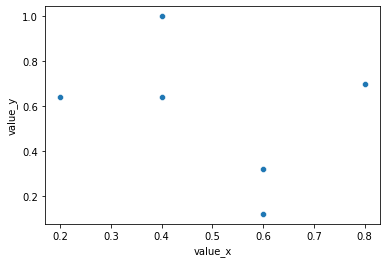

In [22]:
sns.scatterplot(x="value_x", y="value_y", data=c)

In [16]:
# coombs(df)